In [1]:
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/w2w/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_aus = load_svmlight_file(f='australian_scale')
X_train, X_test, y_train, y_test = train_test_split(data_aus[0], data_aus[1], test_size=0.4, random_state=0)

In [3]:
class SVM(object):
    '''
    Parameters:
    ----------
        turns_ : max iteration numbers
        learning_rate_ : learning rate
        c_ : tradeoff
        silence_ : print process or not
        plot_ : plot or not

    Attribute:
    ----------
        w_ : array, shape (n_features, ), [w1, w2, ..., wn]
        b_ : w0, bias

    Data format:
    ----------
        y : m*1
        x : m*n
        w : n*1
        b : 1*1
    '''

    def __init__(self, turns=50, learning_rate=0.01, c=0.1, silence=False, plot=True):
        self.turns_ = turns
        self.learning_rate_ = learning_rate
        self.c_ = c
        self.silence_ = silence
        self.plot_ = plot = plot

    def calc_error(self, X, y, w, b):
        '''
            error = 0.5||w||^2 + C* sum (max(0, 1-yi(wTxi + b)))
        '''
        hinge = 1 - (X.dot(w) + b)*y
        hinge = np.array([max(0, x) for x in hinge])
        #         print(hinge)
        #         print('hingesum', np.sum(hinge))
        #         print('zhengze', w**2)
        error = 0.5 * np.sum(w ** 2) + self.c_ * np.sum(hinge)
        return error

    def gradient(self, X, y, w, b):
        '''
            y_ = Xw + b
            Hinge loss = max(0, 1-yi(wTxi + b))
            g_w = (2/N)*XT*(y_-y)
            g_b = (2/N)*(y_-y)
        '''
        N = X.shape[0]
        hinge = 1 - (X.dot(self.w_) + self.b_)*y
        hinge_derivative_w = np.zeros([self.w_.shape[0]])
        hinge_derivative_b = 0.0
        for i in range(N):
            hin = hinge[i]
            if hin > 0:
                derivative = -self.c_ * y[i] * X[i]
                # 将sparse matrix转化为array
                hinge_derivative_w += derivative.toarray()[0]
                hinge_derivative_b -= y[i]
        g_w = w + np.array(hinge_derivative_w)
        g_b = hinge_derivative_b
        w1 = w - self.learning_rate_ * g_w
        b1 = b - self.learning_rate_ * g_b
        return w1, b1

    def fit(self, X, y):
        '''
            Gradient descent
        '''
        n_features = X.shape[1]
        n_targets = 1
        self.w_ = np.zeros([n_features])
        self.b_ = 0
        loss_list = []
        for i in range(self.turns_):
            if self.silence_ == False:
                print('Turn %d' % i)
                print('w:', self.w_)
                print('b:', self.b_)
                print('Loss:', self.calc_error(X, y, self.w_, self.b_))
                print('---------------------------')
                loss_list.append(self.calc_error(X, y, self.w_, self.b_))
            self.w_, self.b_ = self.gradient(X, y, self.w_, self.b_)
        print('Iteration End')
        print('w:', self.w_)
        print('b:', self.b_)
        print('Loss:', self.calc_error(X, y, self.w_, self.b_))
        print('---------------------------')
        if self.silence_ == False:
            plt.plot(range(self.turns_), loss_list)
            plt.xlabel('Iteration')
            plt.ylabel('Loss')
            plt.title('SVM')
            plt.show()

Turn 0
w: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
b: 0
Loss: 41.4
---------------------------
Turn 1
w: [-0.0002      0.00347287  0.00520079  0.0045      0.00907692  0.005575
  0.00589375  0.0294      0.02        0.0057194   0.0032      0.0023
  0.0020851   0.0040881 ]
b: -0.034
Loss: 39.7439023756
---------------------------
Turn 2
w: [-0.0003998   0.00694227  0.01039637  0.0089955   0.01814477  0.01114442
  0.01178161  0.0587706   0.03998     0.01143308  0.0063968   0.0045977
  0.00416811  0.0081721 ]
b: -0.068
Loss: 38.090884206
---------------------------
Turn 3
w: [-0.0005994   0.0104082   0.01558676  0.0134865   0.02720355  0.01670828
  0.01766359  0.08811183  0.05994002  0.01714105  0.0095904   0.0068931
  0.00624905  0.01225203]
b: -0.102
Loss: 36.4409393353
---------------------------
Turn 4
w: [-0.0007988   0.01387066  0.02077196  0.01797302  0.03625327  0.02226657
  0.02353968  0.11742372  0.07988008  0.02284331  0.01278081  0.00918621
  0.0083279   0.01632

Turn 39
w: [ 0.01615313  0.03308056  0.05139135  0.06764192  0.15852507  0.09321672
  0.0549639   0.7054084   0.34568866  0.04839792  0.01233493  0.0439999
 -0.02996005  0.01323431]
b: 0.089
Loss: 14.9143001175
---------------------------
Turn 40
w: [ 0.01613698  0.03311178  0.05179857  0.06787428  0.1594127   0.0937735
  0.05532416  0.71130299  0.34254297  0.04874057  0.0119226   0.0445559
 -0.03015519  0.01377739]
b: 0.087
Loss: 14.8669037448
---------------------------
Turn 41
w: [ 0.01612084  0.03314296  0.05220537  0.06810641  0.16029944  0.09432973
  0.05568407  0.71719169  0.33940043  0.04908287  0.01151068  0.04511134
 -0.03035014  0.01431993]
b: 0.085
Loss: 14.8196013178
---------------------------
Turn 42
w: [ 0.01610472  0.03317412  0.05261178  0.0683383   0.16118529  0.0948854
  0.05604361  0.7230745   0.33626103  0.04942483  0.01109917  0.04566623
 -0.03054489  0.01486193]
b: 0.083
Loss: 14.7726108139
---------------------------
Turn 43
w: [ 0.01618861  0.03313584  0.05292

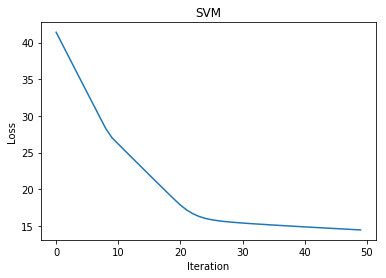

In [4]:
clf = SVM(turns = 50, learning_rate = 0.001, c = 0.1)
clf.fit(X_train, y_train)